Environment set-up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Set the matplotlib style for consistent plotting aesthetics
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Specify the path to the dataset directory
database_path = r'database'

# Get a list of CSV files from the specified directory
files = Path(database_path).glob('*.csv')

# Initialize an empty list to hold individual ETF dataframes
dfs = []

for f in files:
    data = pd.read_csv(f)
    data['ETF_name'] = f.stem
    dfs.append(data)
    
# Concatenate the list of ETF dataframes into a single dataframe
etf = pd.concat(dfs, ignore_index=True)


# Display basic information about the merged dataframe
etf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9540 non-null   object 
 1   Open          9540 non-null   float64
 2   High          9540 non-null   float64
 3   Low           9540 non-null   float64
 4   Close         9540 non-null   float64
 5   Volume        9540 non-null   int64  
 6   Dividends     9540 non-null   float64
 7   Stock Splits  9540 non-null   int64  
 8   ETF_name      9540 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 670.9+ KB


In [2]:
# Convert the 'Date' column to datetime type and ensure 'ETF_name' is treated as a string
etf['Date'] = pd.to_datetime(etf['Date'], utc=True)
etf = etf.astype({'ETF_name': 'string'})

# Display updated information about the dataframe
etf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          9540 non-null   datetime64[ns, UTC]
 1   Open          9540 non-null   float64            
 2   High          9540 non-null   float64            
 3   Low           9540 non-null   float64            
 4   Close         9540 non-null   float64            
 5   Volume        9540 non-null   int64              
 6   Dividends     9540 non-null   float64            
 7   Stock Splits  9540 non-null   int64              
 8   ETF_name      9540 non-null   string             
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), string(1)
memory usage: 670.9 KB


In [3]:
#Selecting and printing columns
etf.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'ETF_name'],
      dtype='object')

Initial Diagonistics

In [4]:
#Selecting unique ETF and setting the index. 
unique_etf = etf.index.unique()


# Add new columns for year, month, and day extracted from the 'Date' column
etf['Year'] = etf['Date'].dt.year
etf['Month'] = etf['Date'].dt.month
etf['Day'] = etf['Date'].dt.day

#Check the result
etf.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ETF_name,Year,Month,Day
0,2019-02-04 05:00:00+00:00,19.837522,20.073683,19.834570,20.073683,47200,0.0,0,ARKF,2019,2,4
1,2019-02-05 05:00:00+00:00,20.152404,20.280325,20.103204,20.204557,110700,0.0,0,ARKF,2019,2,5
2,2019-02-06 05:00:00+00:00,20.191766,20.205542,19.985124,20.142565,45300,0.0,0,ARKF,2019,2,6
3,2019-02-07 05:00:00+00:00,19.965444,19.994963,19.680082,19.847363,58200,0.0,0,ARKF,2019,2,7
4,2019-02-08 05:00:00+00:00,19.680081,19.886721,19.630882,19.867043,18900,0.0,0,ARKF,2019,2,8


Calculate Mean Price and Summarize by ETF
The average price is calculated by trading parameters such as 'Open', 'High', 'Low', and 'Close'

In [5]:
#Calculate the mean of 'Open', 'High', 'Low', and 'Close' columns and add it as a new column#mean_by_etf = pd.DataFrame()
etf['mean'] = etf.loc[:, 'Open':'Close'].mean(axis=1)
etf.groupby('ETF_name')['mean'].describe()


,count,mean,std,min,25%,50%,75%,max
ETF_name,,,,,,,,
ARKF,938.0,32.945041,13.527544,14.835000,21.444648,26.967235,47.505217,63.728748
BITQ,366.0,16.808884,7.549565,5.598750,8.224562,17.711250,22.607584,33.691152
BLOK,1195.0,23.866389,11.389230,11.532612,15.636625,17.396378,31.950500,55.625428
EMFQ,941.0,34.521546,11.567484,18.219000,26.003816,28.481263,44.715500,62.109750
FINX,1259.0,30.706859,8.510393,19.225670,24.115913,27.455002,36.894191,49.755937
FNTC,191.0,16.628266,4.453932,10.554000,12.985250,15.420942,20.436497,26.818747
IPAY,1259.0,49.237790,11.398876,31.630000,39.867963,46.812153,56.003874,72.834999
IYG,1259.0,141.298568,27.132331,84.979558,120.831230,129.046152,163.698840,200.400542
KOIN,1192.0,31.184145,7.193204,19.982987,24.861219,29.397719,38.190374,44.951830


Mapping Colors to ETFs and Visualizing Trading Volume and Visualizing ETF Trading Volume

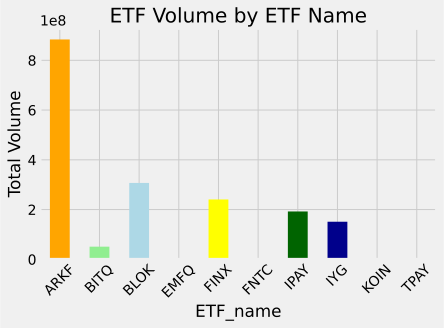

ETF_name
ARKF    883711400
BITQ     51067800
BLOK    307012100
EMFQ      3815000
FINX    240608700
FNTC       337200
IPAY    192341300
IYG     151233100
KOIN      5528700
TPAY      2087906
Name: Volume, dtype: int64

In [6]:
# Create a list of colors corresponding to unique ETFs
COLORS = ('orange', 'lightgreen', 'lightblue',
          'red', 'yellow', 'brown', 'darkgreen', 'darkblue', 'black', 'purple')
etf_colors = dict(zip(unique_etf, COLORS))

# Group ETFs by name and calculate the total trading volume
volume_sum_by_etf = etf.groupby('ETF_name')['Volume'].sum()


# Plot a bar chart to visualize total trading volume for each ETF
ax = volume_sum_by_etf.plot(kind='bar', color=COLORS, legend=False, grid=True)
ax.set_ylabel('Total Volume')
ax.set_title('ETF Volume by ETF Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
volume_sum_by_etf


Individual ETF Volume Analysis

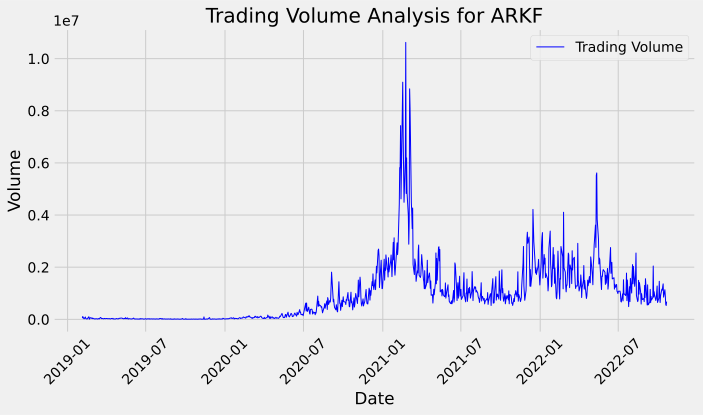

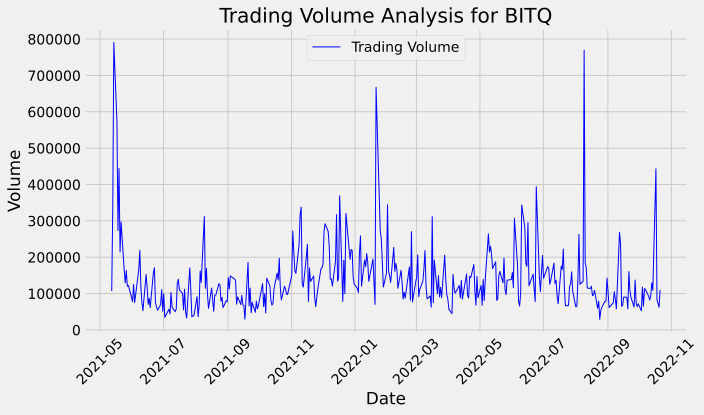

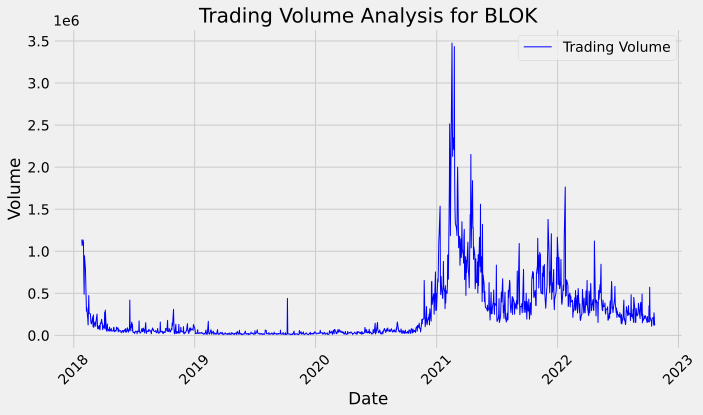

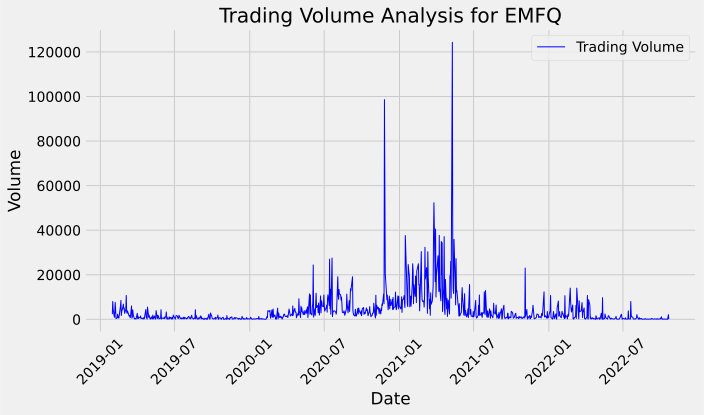

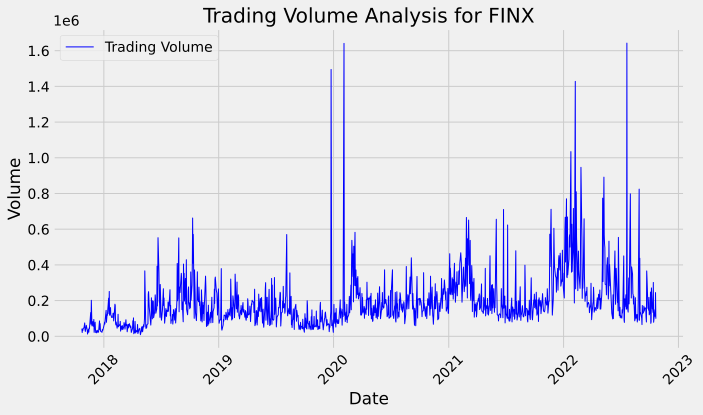

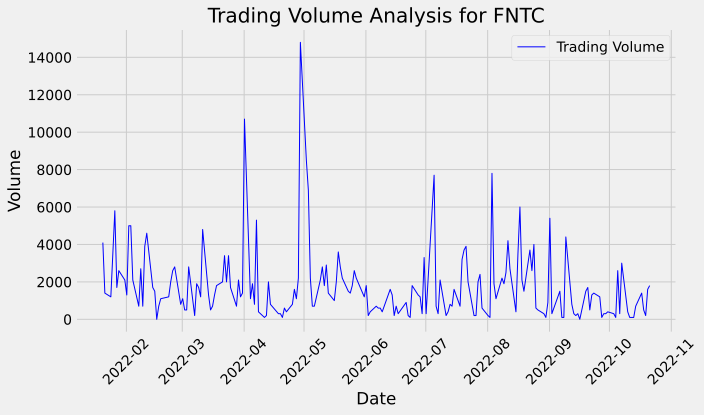

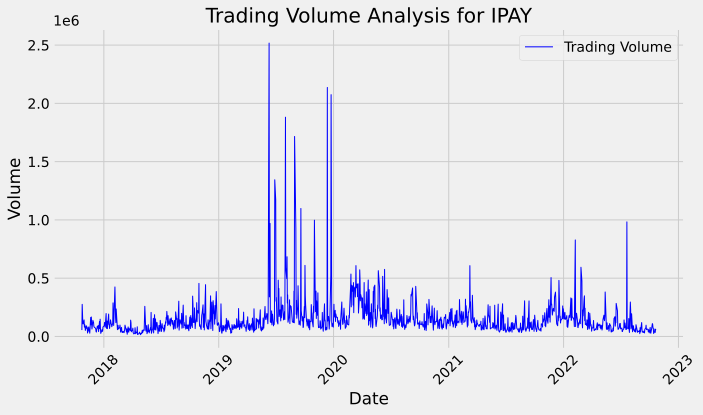

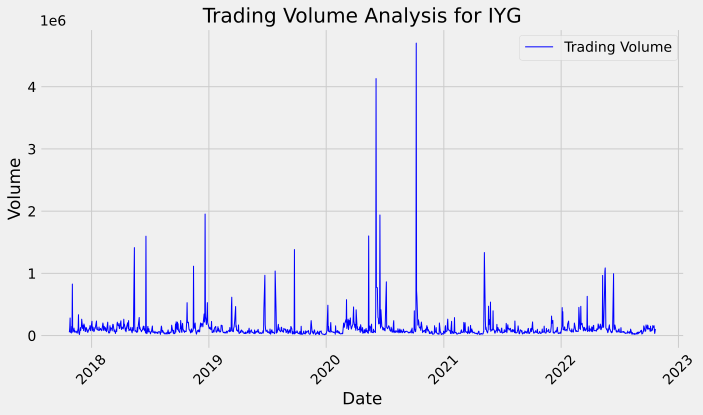

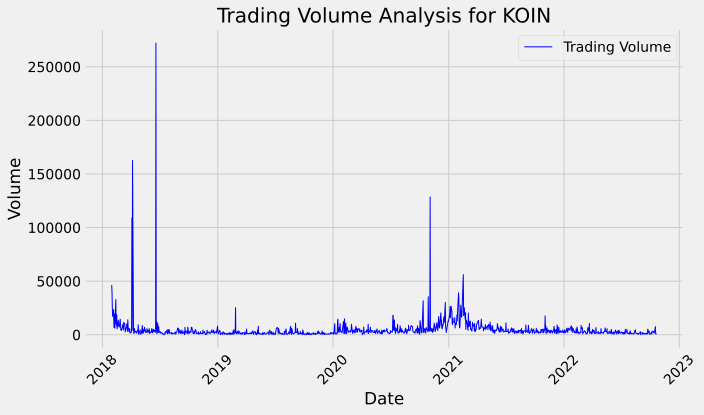

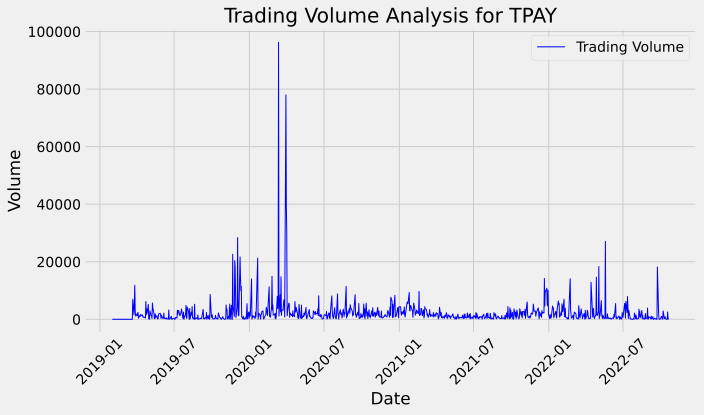

In [7]:
# Plot volume analysis for each ETF
for etf_name in etf['ETF_name'].unique():
    etf_subset = etf[etf['ETF_name'] == etf_name]
    
    # Create a subplot for volume analysis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot trading volume
    ax.plot(etf_subset['Date'], etf_subset['Volume'],
            linewidth = 1, label='Trading Volume', color='blue')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.set_title(f'Trading Volume Analysis for {etf_name}')
    ax.legend()
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Visualizing ETF Mean Prices Over Time for all ETF's

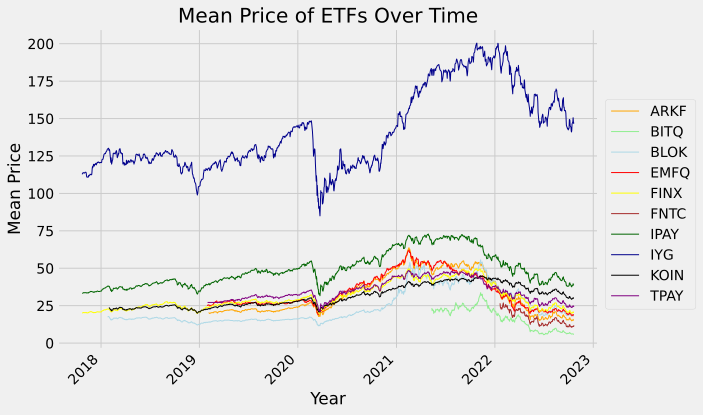

In [8]:
# Pivot the DataFrame to have each ETF's mean price as columns
pivot_etf = etf.pivot_table(
    index='Date', columns='ETF_name', values='mean', aggfunc='mean')

# Plot a separate line for each ETF
ax2 = pivot_etf.plot.line(
    linewidth = 1, legend=True, figsize=(10, 6), color=COLORS)
ax2.set_xlabel('Year')
ax2.set_ylabel('Mean Price')
ax2.set_title('Mean Price of ETFs Over Time')
plt.xticks(rotation=45)
ax2.legend(bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()


Visualizing ETF Mean Prices Over Time for each ETF

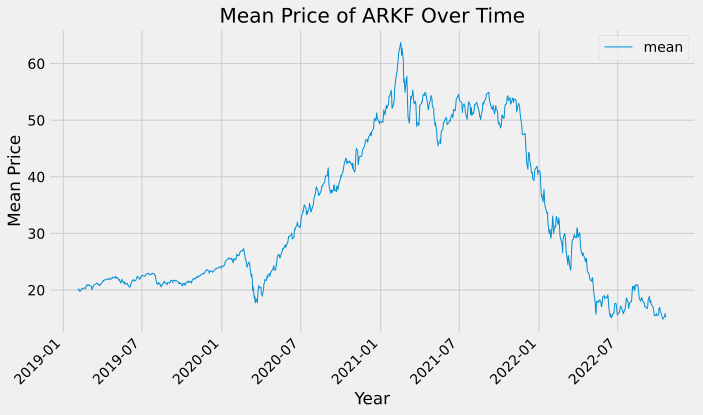

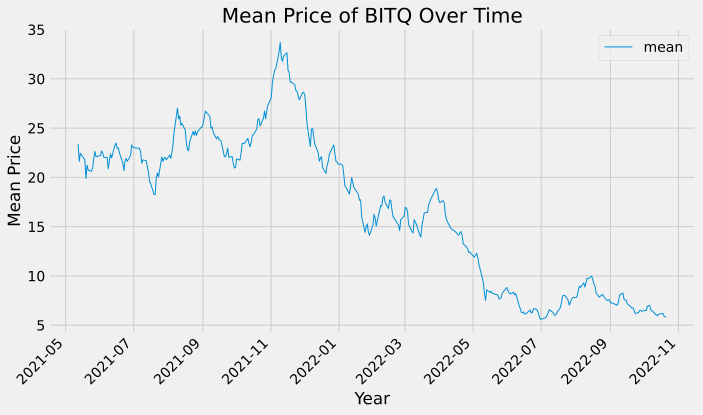

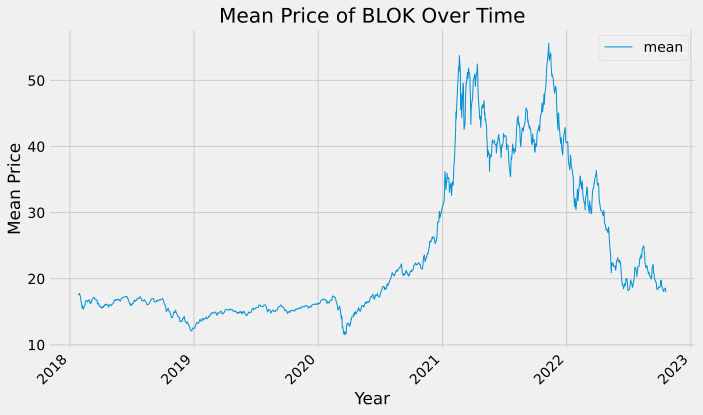

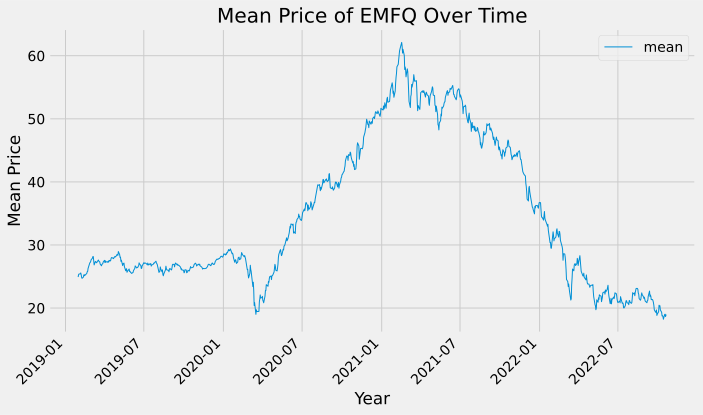

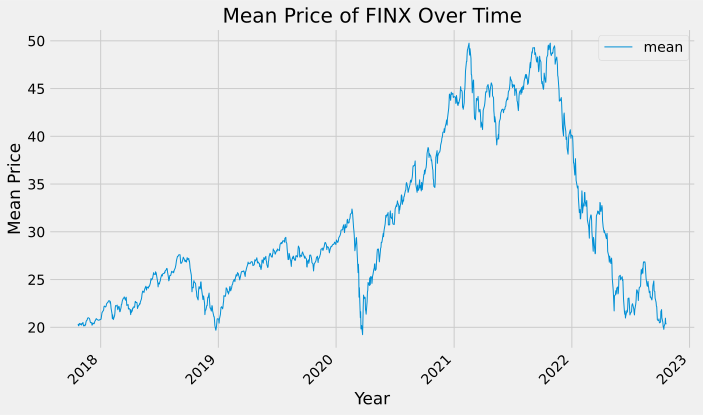

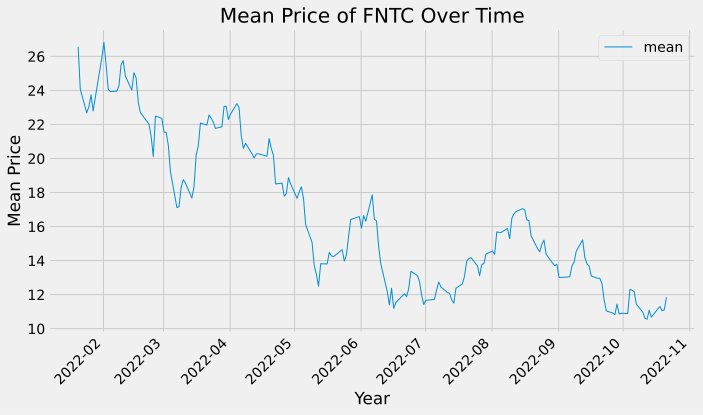

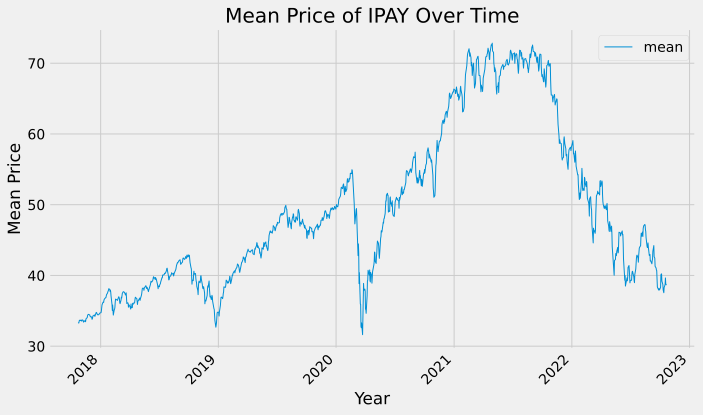

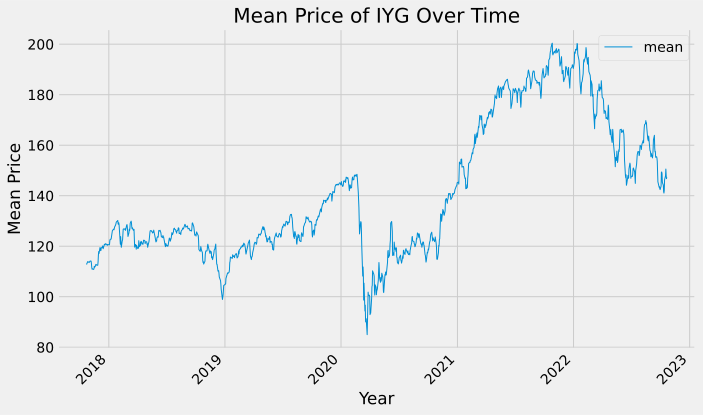

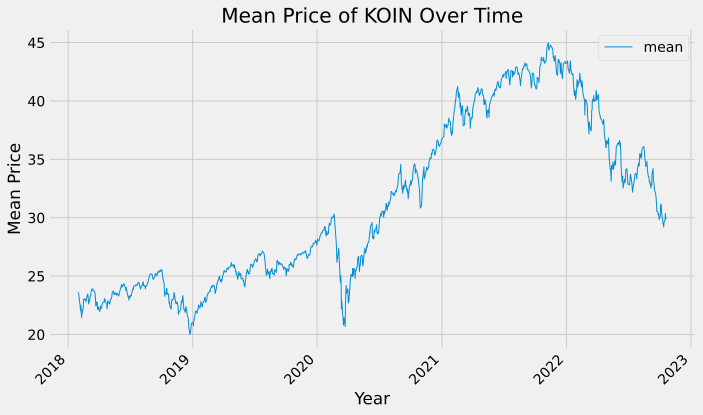

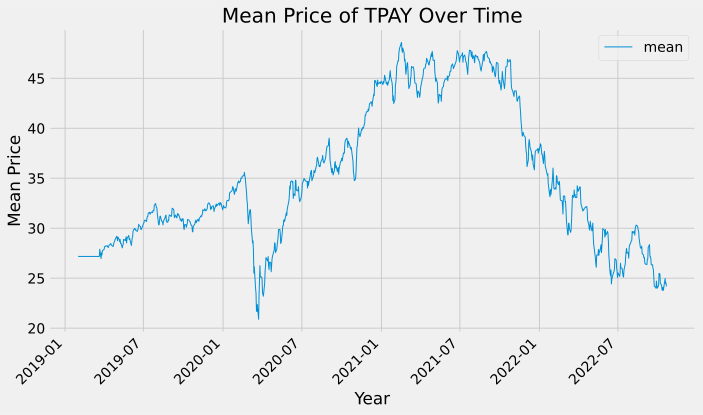

In [9]:
# Create separate line plots for each ETF
for etf_name in etf['ETF_name'].unique():
    etf_subset = etf[etf['ETF_name'] == etf_name]
       # # Plotting the line plot for the current ETF

    ax = etf_subset.plot.line(x='Date', y='mean', linewidth=1, figsize=(10, 6))
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Price')
    ax.set_title(f'Mean Price of {etf_name} Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

A bar plot is created to visualize the volatility of each ETF.

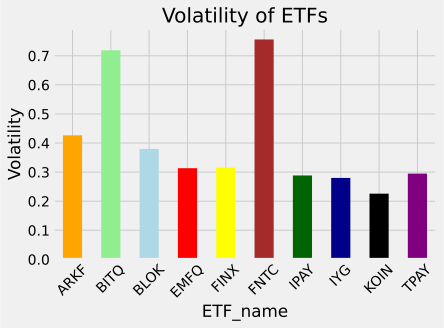

In [10]:
# Calculate daily returns
etf['Daily_Return'] = etf.groupby('ETF_name')['Close'].pct_change()

# Calculate annualized volatility (assuming 252 trading days in a year)
etf_volatility = etf.groupby('ETF_name')['Daily_Return'].std() * np.sqrt(252)

# Visualize volatility
ax = etf_volatility.plot(kind='bar', color=COLORS, legend=False, grid=True)
ax.set_ylabel('Volatility')
ax.set_title('Volatility of ETFs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Calculating and Visualizing Correlation Matrix

* The code calculates the correlation matrix between daily returns of different ETFs.
* The correlation matrix is visualized as a heatmap, showing the correlation values between ETF pairs.

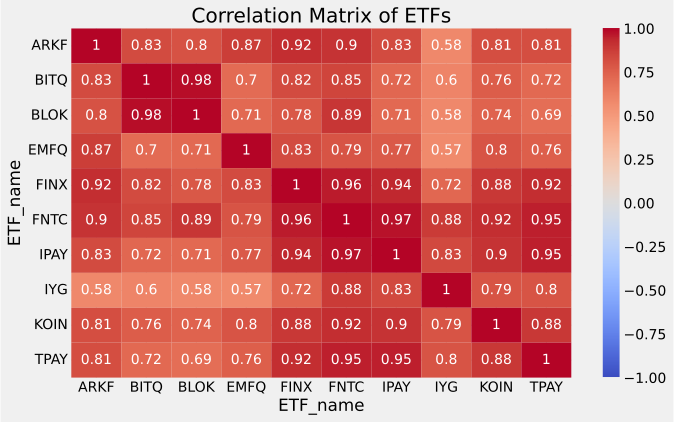

In [11]:
# Calculate daily returns
etf['Daily_Return'] = etf.groupby('ETF_name')['Close'].pct_change()

# Calculate correlation matrix
correlation_matrix = etf.pivot_table(
    index='Date', columns='ETF_name', values='Daily_Return').corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of ETFs')
plt.show()

Return Analysis


Calculating and Analyzing Price Differences

* The code calculates the price difference and percentage difference between the first and last closed prices for each ETF.
* The percentage difference is calculated as `(last_closed_price - first_closed_price) / first_closed_price * 100`.
* The ETF name and price difference are printed.

In [12]:
#Calculating the difference between the first closed price, and the last
for etf_name in etf['ETF_name'].unique():
    etf_subset = etf[etf['ETF_name'] == etf_name]
    
    # Get the first and last closed prices
    first_closed_price = etf_subset['Close'].iloc[0]
    last_closed_price = etf_subset['Close'].iloc[-1]

    # Calculate the difference
    price_difference = last_closed_price - first_closed_price
    percentage_difference = price_difference/first_closed_price*100
    percentage_difference = percentage_difference.round(2)
    
    # Print the ETF name and the price difference
    print(f'ETF: {etf_name}, Price Difference: {percentage_difference}%')
   

ETF: ARKF, Price Difference: -22.59%
ETF: BITQ, Price Difference: -73.63%
ETF: BLOK, Price Difference: 5.52%
ETF: EMFQ, Price Difference: -24.33%
ETF: FINX, Price Difference: 1.57%
ETF: FNTC, Price Difference: -57.09%
ETF: IPAY, Price Difference: 17.62%
ETF: IYG, Price Difference: 32.77%
ETF: KOIN, Price Difference: 29.29%
ETF: TPAY, Price Difference: -9.44%


Calculating Returns

* The code calculates daily returns for each ETF using the percentage change in the 'Close' prices.
* Annualized volatility is calculated for each ETF using the standard deviation of daily returns multiplied by the square root of 252 (assuming 252 trading days in a year).

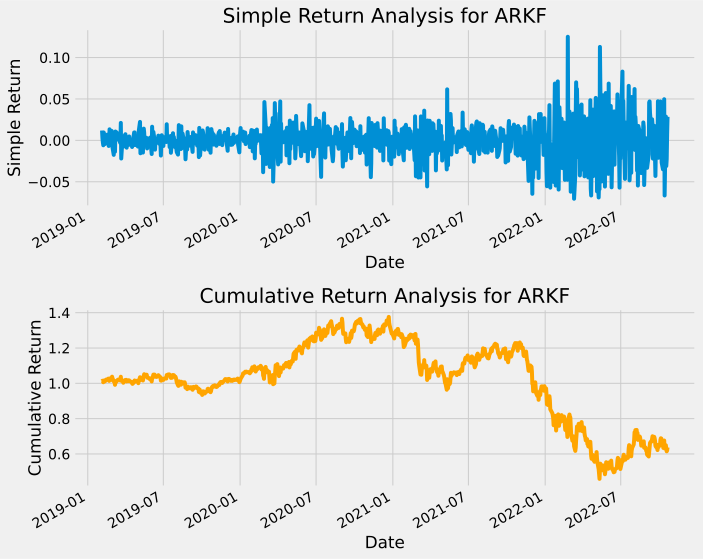

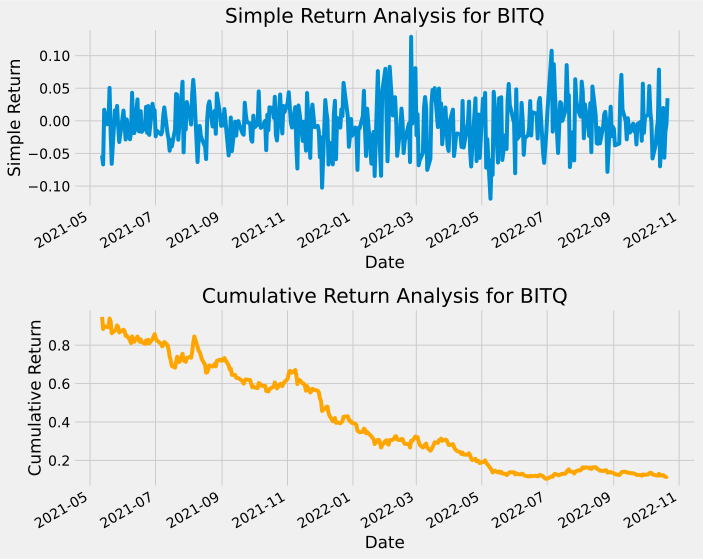

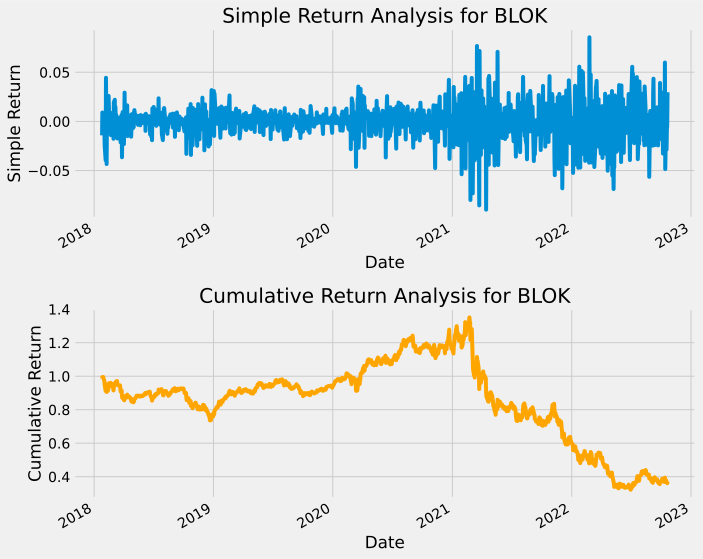

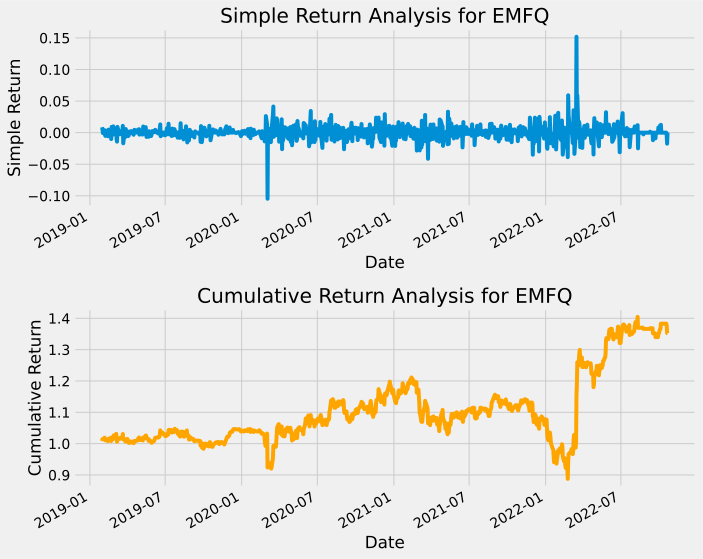

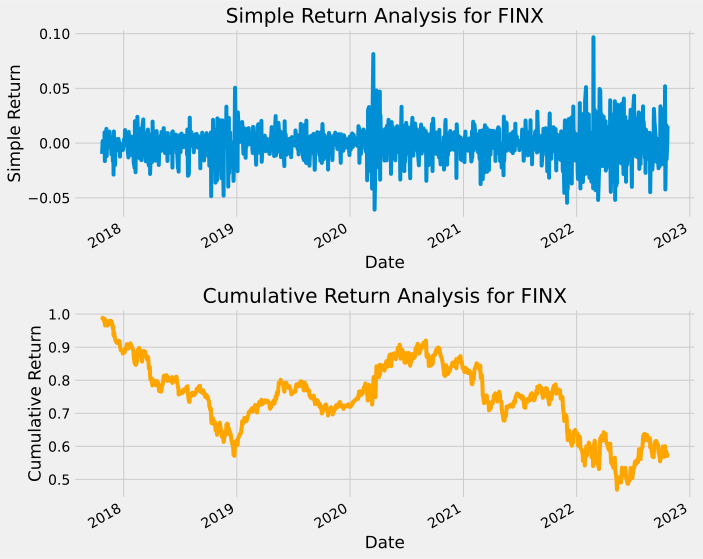

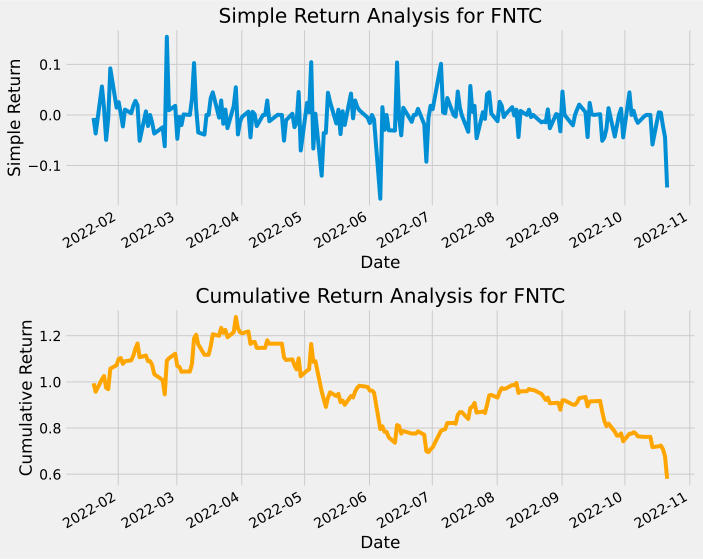

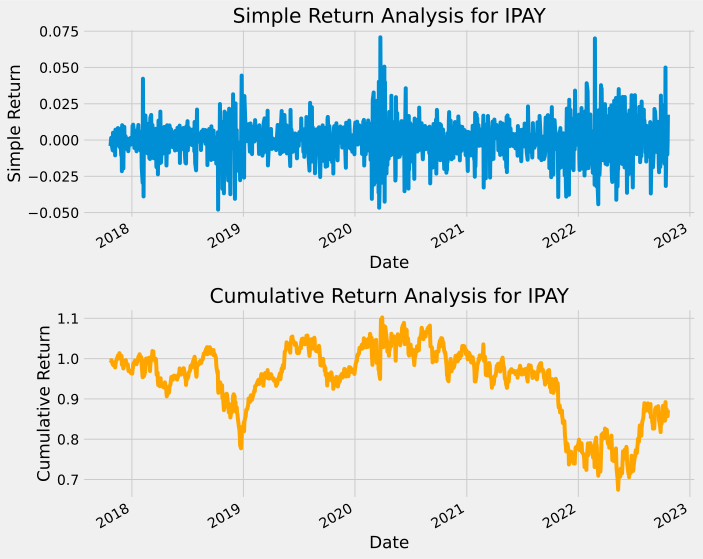

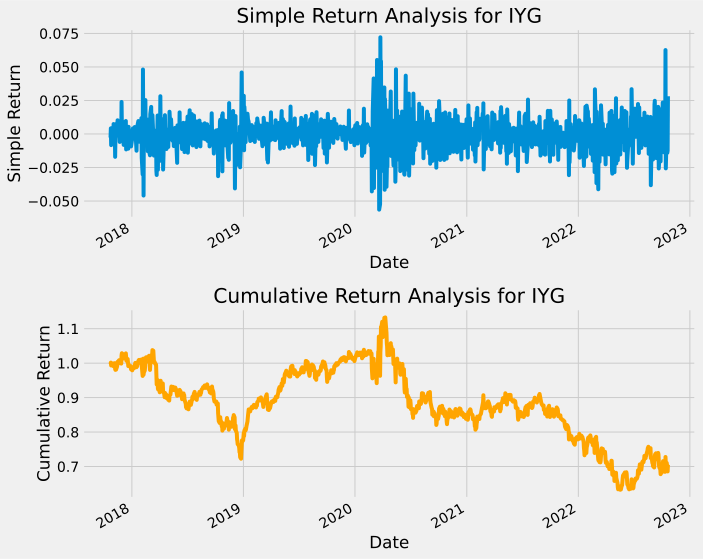

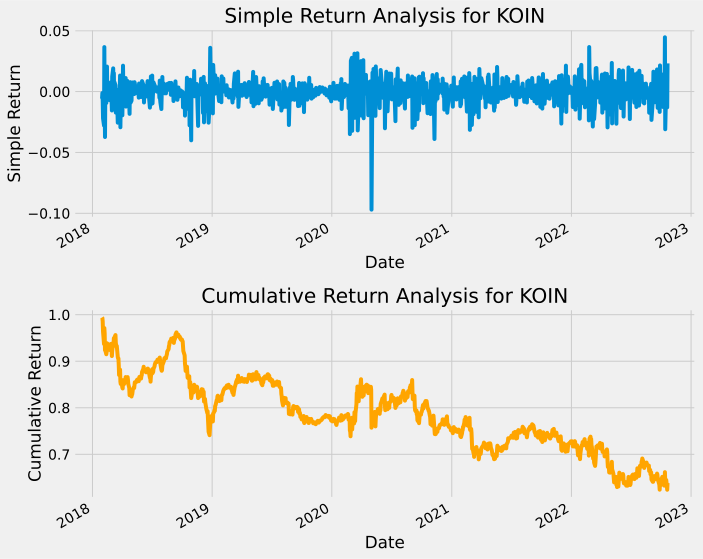

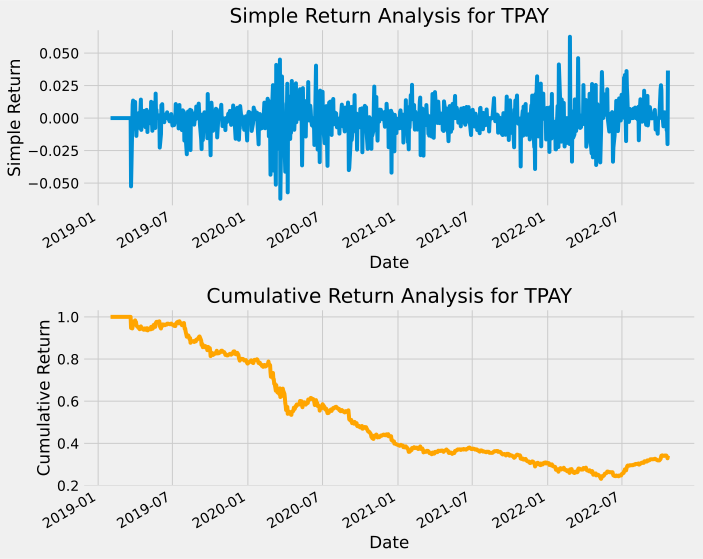

In [13]:

# Plot individual return analysis for each ETF
for etf_name in etf['ETF_name'].unique():
    etf_subset = etf[etf['ETF_name'] == etf_name].copy()
    
    # Calculate simple returns
    etf_subset['simple_return'] = (etf_subset.loc[:,'Close'] -etf_subset.loc[:,'Open']) / etf_subset.loc[:,'Open']
    
    # Calculate logarithmic returns
    etf_subset['log_return'] = np.log(etf_subset.loc[:,'Close'] / etf_subset.loc[:,'Open'])
    
    # Calculate cumulative returns
    etf_subset['cumulative_return'] = (1 + etf_subset['simple_return']).cumprod()
    
    # Create subplots for each ETF's return analysis
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    
    # Plot simple returns
    ax = etf_subset.plot(x='Date', y='simple_return', ax=axes[0])
    ax.set_xlabel('Date')
    ax.set_ylabel('Simple Return')
    ax.set_title(f'Simple Return Analysis for {etf_name}')
    ax.legend().set_visible(False)
    
    # Plot cumulative returns
    ax = etf_subset.plot(x='Date', y='cumulative_return', ax=axes[1], color='orange')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Return')
    ax.set_title(f'Cumulative Return Analysis for {etf_name}')
    ax.legend().set_visible(False)
    
    plt.tight_layout()
    plt.show()